In [ ]:
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.cm as cm1
import matplotlib.colors as colors
import seaborn as sns
import numpy as np
import plotly.express as px
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
import plotly.graph_objects as go
from tqdm import tqdm
from IPython.display import display, HTML


In [ ]:
import ipywidgets as widgets
from ipywidgets import interactive
from ipywidgets import HBox, VBox
from IPython.display import display, Markdown

from sklearn import metrics
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing


In [48]:
data=pd.read_csv("cardata.csv")
df=pd.DataFrame(data)
display(df.head())
display(df.tail())

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [37]:
df["Fuel_Type"]=df["Fuel_Type"].map({"Petrol":2,"Diesel":3,"CNG":4}) 
df["Seller_Type"]=df["Seller_Type"].map({"Dealer":2,"Individual":3})
df["Transmission"]=df["Transmission"].map({"Manual":2,"Automatic":3})
df=df.drop("Car_Name",axis=1)

In [38]:
df["age"]=2019-df["Year"]
df.drop("Year",axis=1,inplace=True)

In [39]:
x=df.drop("Selling_Price",axis=1)
y=df["Selling_Price"]

In [40]:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [ ]:
model=LinearRegression()
model.fit(x_train,y_train)


In [ ]:
y_pred=model.predict(x_test)

In [ ]:
print("MAE:", metrics.mean_absolute_error(y_test, y_pred))
print("MSE:", metrics.mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score:", metrics.r2_score(y_test, y_pred))


In [55]:
sc = KFold(5)
res = cross_val_score(model, x, y.ravel(), cv=sc)
print("Cross-validation scores:", res)
pd.DataFrame(res)

Cross-validation scores: [  0.83482494   0.77512003 -94.61105213   0.61088628   0.83892197]


C:\Users\abolfazl\AppData\Local\Temp\ipykernel_13760\2631536547.py:2: FutureWarning:

Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.



,0
0,0.834825
1,0.775120
2,-94.611052
3,0.610886
4,0.838922


In [56]:

def check(daimn,stat):
    r2=0.9704549090741041
    for coumn in x:
        new_column=coumn+str(daimn)
        new_val=x[coumn]**daimn
        x.insert(0,new_column,new_val)
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=stat, random_state=0)
        model=LinearRegression()
        model.fit(x_train,y_train)
        y_pred=model.predict(x_test)
        r2new=metrics.r2_score(y_test,y_pred)
        if r2new<r2:
            x.drop([new_column],axis=1,inplace=True)
        else:
            r2=r2new
    print(r2)
check(2,0.2)  

0.9704549090741041


In [ ]:
x.insert(0,"pre_kmw",pre_kmw)
x.insert(0,"pre_kmw2",pre_kmw2)
x.insert(0,"pre_ful",pre_ful)
x.insert(0,"pre_ful2",pre_ful2)

x.insert(0,"pre2_kmw",pre2_kmw)
x.insert(0,"pre2_kmw2",pre2_kmw2)
x.insert(0,"pre2_ful",pre2_ful)
x.insert(0,"pre2_ful2",pre2_ful2)

NameError: name 'pre_kmw2' is not defined

In [ ]:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print("MAE:", metrics.mean_absolute_error(y_test, y_pred))
print("MSE:", metrics.mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score:", metrics.r2_score(y_test, y_pred))


MAE: 1.0000326012144767
MSE: 2.1885564456572246
RMSE: 1.4793770464818037
R2 Score: 0.913418172122469


In [ ]:
sc = KFold(5)
res = cross_val_score(model, x, y.ravel(), cv=sc)
print("Cross-validation scores:", res)
pd.DataFrame(res)

Cross-validation scores: [  0.83482494   0.77512003 -94.61105213   0.61088628   0.83892197]


C:\Users\abolfazl\AppData\Local\Temp\ipykernel_15284\2631536547.py:2: FutureWarning:

Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.



,0
0,0.834825
1,0.775120
2,-94.611052
3,0.610886
4,0.838922


MAE: 1.2891386210148712
MSE: 5.501518122517797
RMSE: 2.3455315223884323
R2 Score: 0.8503226420374982


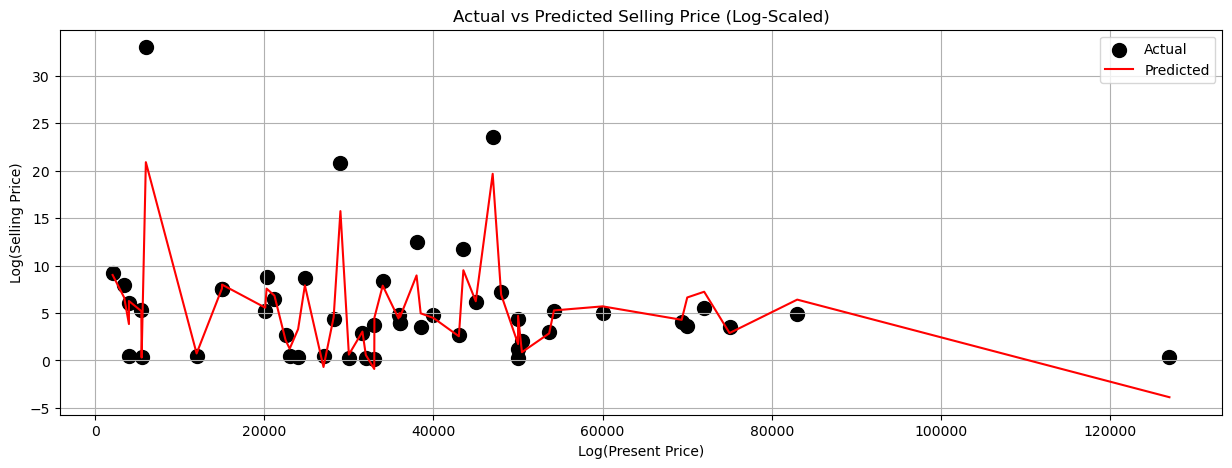

In [ ]:
x1=x[x.index<100]
x2=x[x.index>15]
xnew = pd.conca1t([x1, x2], ignore_index=True)
y1=y[y.index<100]
y2=y[y.index>151]
ynew = pd.concat([y1, y2], ignore_index=True)




x_train, x_test, y_train, y_test = train_test_split(xnew, ynew, test_size=0.2, random_state=0)
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print("MAE:", metrics.mean_absolute_error(y_test, y_pred))
print("MSE:", metrics.mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score:", metrics.r2_score(y_test, y_pred))
x_test_plot = x_test.copy()
x_test_plot["y_test"] = y_test
x_test_plot["y_pred"] = y_pred

data1 = x_test_plot.sort_values(by="Kms_Driven")
plt.figure(figsize=(15, 5))
plt.scatter(data1["Kms_Driven"], data1["y_test"], color="black", s=100, label="Actual")
plt.plot(data1["Kms_Driven"], data1["y_pred"], color="red", label="Predicted")
plt.xlabel("Log(Present Price)")
plt.ylabel("Log(Selling Price)")
plt.title("Actual vs Predicted Selling Price (Log-Scaled)")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
Present_Price=float(input("Present_Price"))	
Kms_Driven=float(input("Kms_Driven"))	
Fuel_Type=float(input("Fuel_Type"))	
Seller_Type=float(input("Seller_Type"))	
Transmission=float(input("Transmission"))	
Owner=float(input("Owner"))	
age=float(input("age"))	

inpt=pd.DataFrame({"Selling_Price":10,
                "age":[age],
                "Owner":[Owner],
                "Transmission":[Transmission],
                "Fuel_Type":[Fuel_Type],
                    "Seller_Type":[Seller_Type],
                    "Kms_Driven":[Kms_Driven],
                    "Present_Price":[Present_Price],       
                    "Present_Price2":[Present_Price**2],
                    "Kms_Driven2":[Kms_Driven**2],
                    "Fuel_Type2":[Fuel_Type**2],
                    "Owner2":[Owner**2],
                    "pre_kmw":[((Present_Price)* (Kms_Driven))],
                    "pre_kmw2":[((Present_Price)* (Kms_Driven**2))],
                    "pre_ful":[((Present_Price)* (Fuel_Type))],
                    "pre_ful2":[((Present_Price)* (Fuel_Type**2))],
                    "pre2_kmw":[((Present_Price**2)* (Kms_Driven))],
                    "pre2_kmw2":[((Present_Price**2)* (Kms_Driven**2))],
                    "pre2_ful":[((Present_Price**2)* (Fuel_Type))],
                    "pre2_ful2":[((Present_Price**2)* (Fuel_Type**2))]
})


In [59]:
y.name = "Selling_Price"  
Final1 = pd.concat([xnew, ynew], axis=1)


NameError: name 'xnew' is not defined

In [ ]:
now = pd.concat([Final1, inpt], ignore_index=True)

In [ ]:
now

,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,age,Selling_Price,Present_Price2,Kms_Driven2,Fuel_Type2,Owner2,pre_kmw,pre_kmw2,pre_ful,pre_ful2,pre2_kmw,pre2_kmw2,pre2_ful,pre2_ful2
0,5.59,27000.0,2.0,2.0,2.0,0.0,5.0,3.35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,9.54,43000.0,3.0,2.0,2.0,0.0,6.0,4.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9.85,6900.0,2.0,2.0,2.0,0.0,2.0,7.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.15,5200.0,2.0,2.0,2.0,0.0,8.0,2.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6.87,42450.0,3.0,2.0,2.0,0.0,5.0,4.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,5.90,60000.0,2.0,2.0,2.0,0.0,4.0,4.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
246,11.00,87934.0,2.0,2.0,2.0,0.0,10.0,3.35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
247,12.50,9000.0,3.0,2.0,2.0,0.0,2.0,11.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
248,5.90,5464.0,2.0,2.0,2.0,0.0,3.0,5.30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
x=now.drop("Selling_Price",axis=1)[:249]
y=now["Selling_Price"][:249]
x_final=now.drop("Selling_Price",axis=1)[249:]
model.fit(x,y)
y_pred=model.predict(x_final)
y_pred

NameError: name 'now' is not defined

In [ ]:
df[df["Selling_Price"]<1]

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,age
37,0.35,2.28,127000,2,3,2,0,16
124,0.95,1.75,11500,2,3,2,0,7
125,0.90,1.75,40000,2,3,2,0,10
126,0.90,0.95,1300,2,3,2,0,2
127,0.75,0.80,7000,2,3,2,0,3
...,...,...,...,...,...,...,...,...
196,0.17,0.52,500000,2,3,3,0,11
197,0.16,0.51,33000,2,3,2,0,9
198,0.15,0.57,35000,2,3,2,1,8
199,0.12,0.58,53000,2,3,2,0,12
